<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 171.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 172.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 99.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




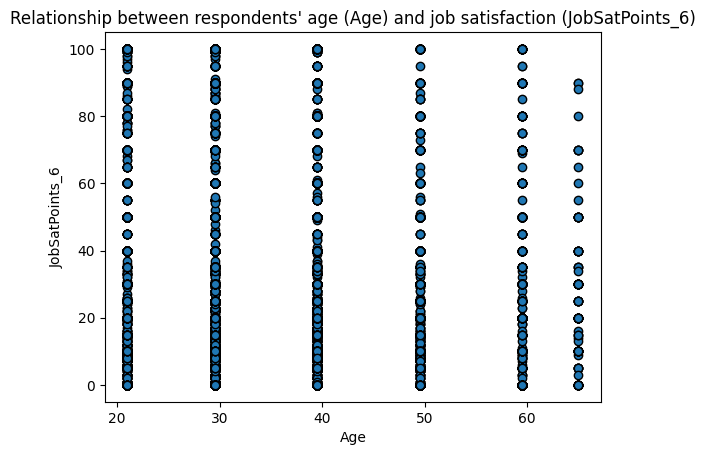

In [5]:
## Write your code here
def age_to_int_mapping(age_range):
    if "under" in age_range:
        return 15
    elif "older" in age_range:
        return 65
    else:
        try:
            start, end = map(int, age_range.split(' ')[0].split('-'))
            return (start+end) / 2
        except ValueError:
            return None            
df['Age'] = df['Age'].apply(age_to_int_mapping)  
#plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['JobSatPoints_6'], edgecolors='black')
plt.title("Relationship between respondents' age (Age) and job satisfaction (JobSatPoints_6)")
plt.xlabel("Age")
plt.ylabel("JobSatPoints_6")
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


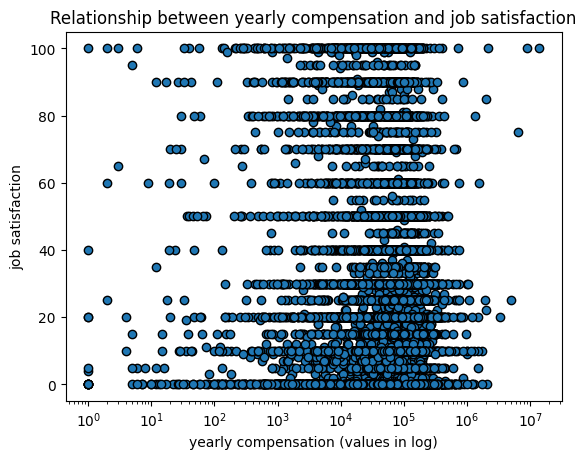

In [6]:
## Write your code here
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], edgecolors='black')
plt.title('Relationship between yearly compensation and job satisfaction')
plt.xlabel('yearly compensation (values in log)')
plt.ylabel('job satisfaction')
plt.xscale('log')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


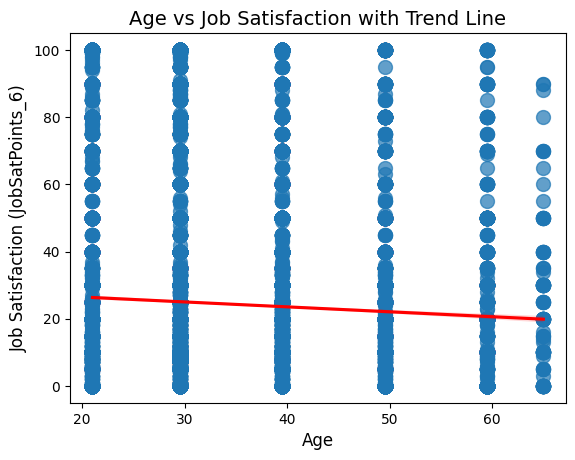

In [7]:
## Write your code here
#plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='JobSatPoints_6', data=df, scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Age vs Job Satisfaction with Trend Line', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
#plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


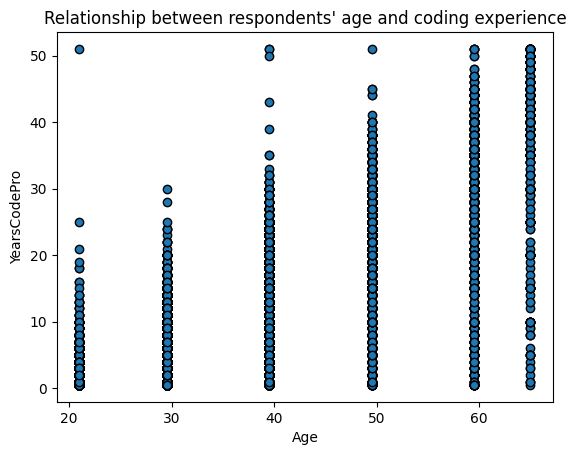

In [8]:
## Write your code here
df2 = df
def YearsCodePro_int(pro_range):
    if 'Less' in str(pro_range):
        return 0.5
    elif 'More' in str(pro_range):
        return 51
    else: return pro_range
df2['YearsCodePro'] = pd.to_numeric(df2['YearsCodePro'].apply(YearsCodePro_int))

plt.scatter(df['Age'], df2['YearsCodePro'], edgecolors='black')
plt.title("Relationship between respondents' age and coding experience")
plt.xlabel("Age")
plt.ylabel("YearsCodePro")
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


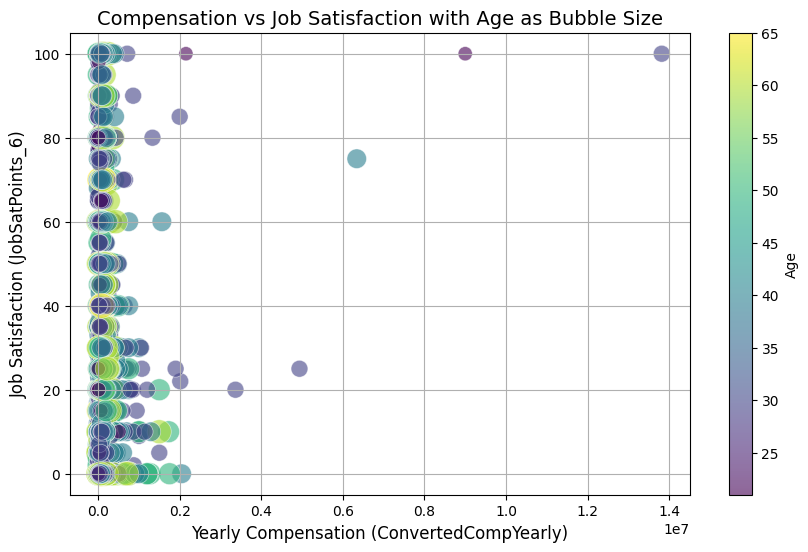

In [9]:
## Write your code here
plt.figure(figsize=(10, 6))

# Scatter plot with age as the bubble size
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'],
            s=df['Age'] *5,  # Bubble size proportional to Age (scaled)
            alpha=0.6,          # Transparency for better visualization
            c=df['Age'],        # Color by Age
            cmap='viridis',     # Color map for bubble colors
            edgecolors='w',     # White edge color for bubbles
            linewidth=0.5)

# Add labels and title
plt.title('Compensation vs Job Satisfaction with Age as Bubble Size', fontsize=14)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)

# Add a color bar for Age
plt.colorbar(label='Age')
#plt.xscale('log')

plt.grid(True)
plt.show()

### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


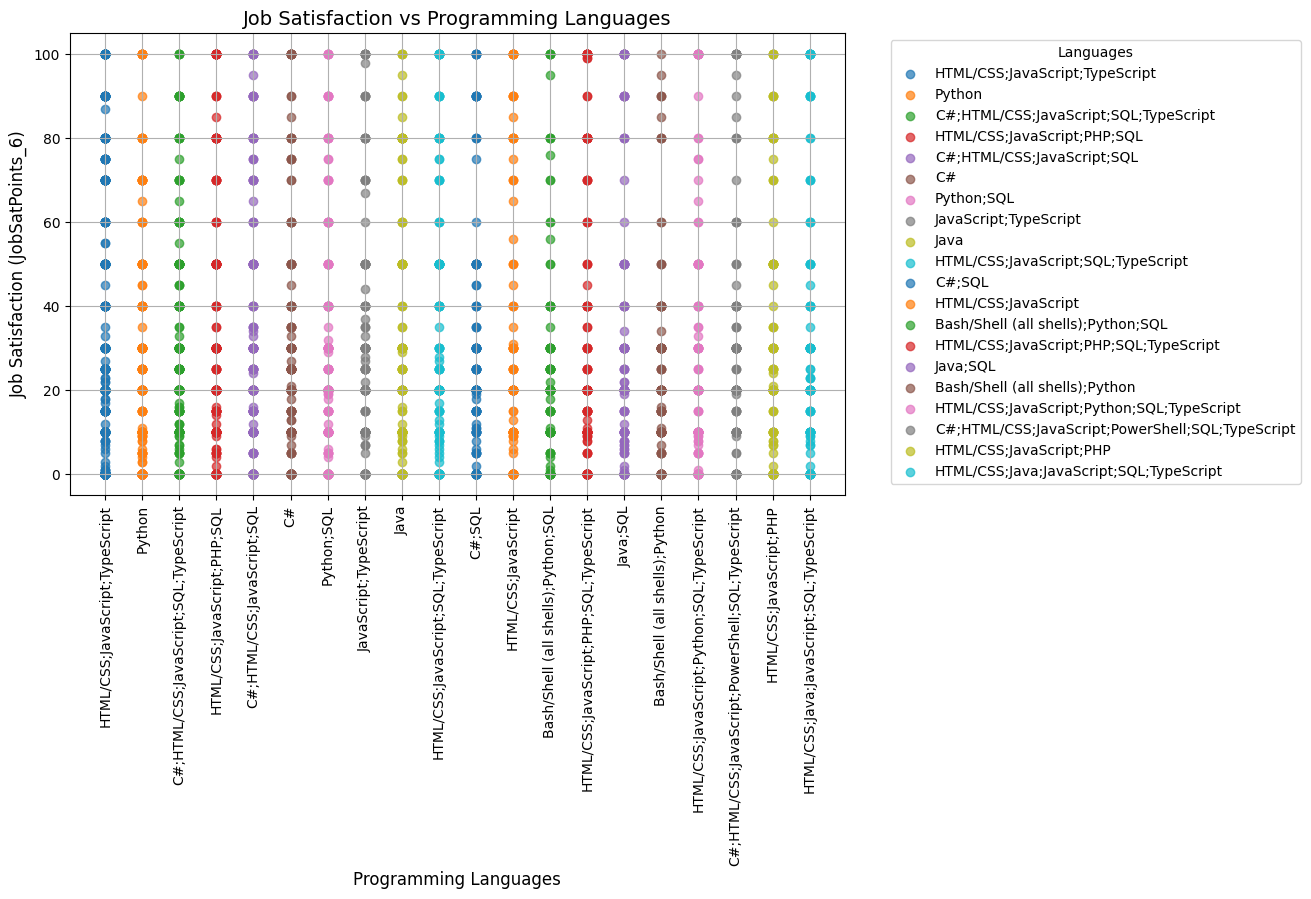

In [17]:
# Write your code here
df = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])
languages = df['LanguageHaveWorkedWith'].value_counts().head(20).index # taken top 20 languages 
plt.figure(figsize=(10, 6))

# Iterate over each language and plot job satisfaction points
for language in languages:
    subset = df[df['LanguageHaveWorkedWith'] == language]
    plt.scatter([language] * len(subset), subset['JobSatPoints_6'], alpha=0.7, label=language)

# Customize the plot
plt.title('Job Satisfaction vs Programming Languages', fontsize=14)
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

# Optional: Add a legend to show languages
plt.legend(title='Languages', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Show the plot
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


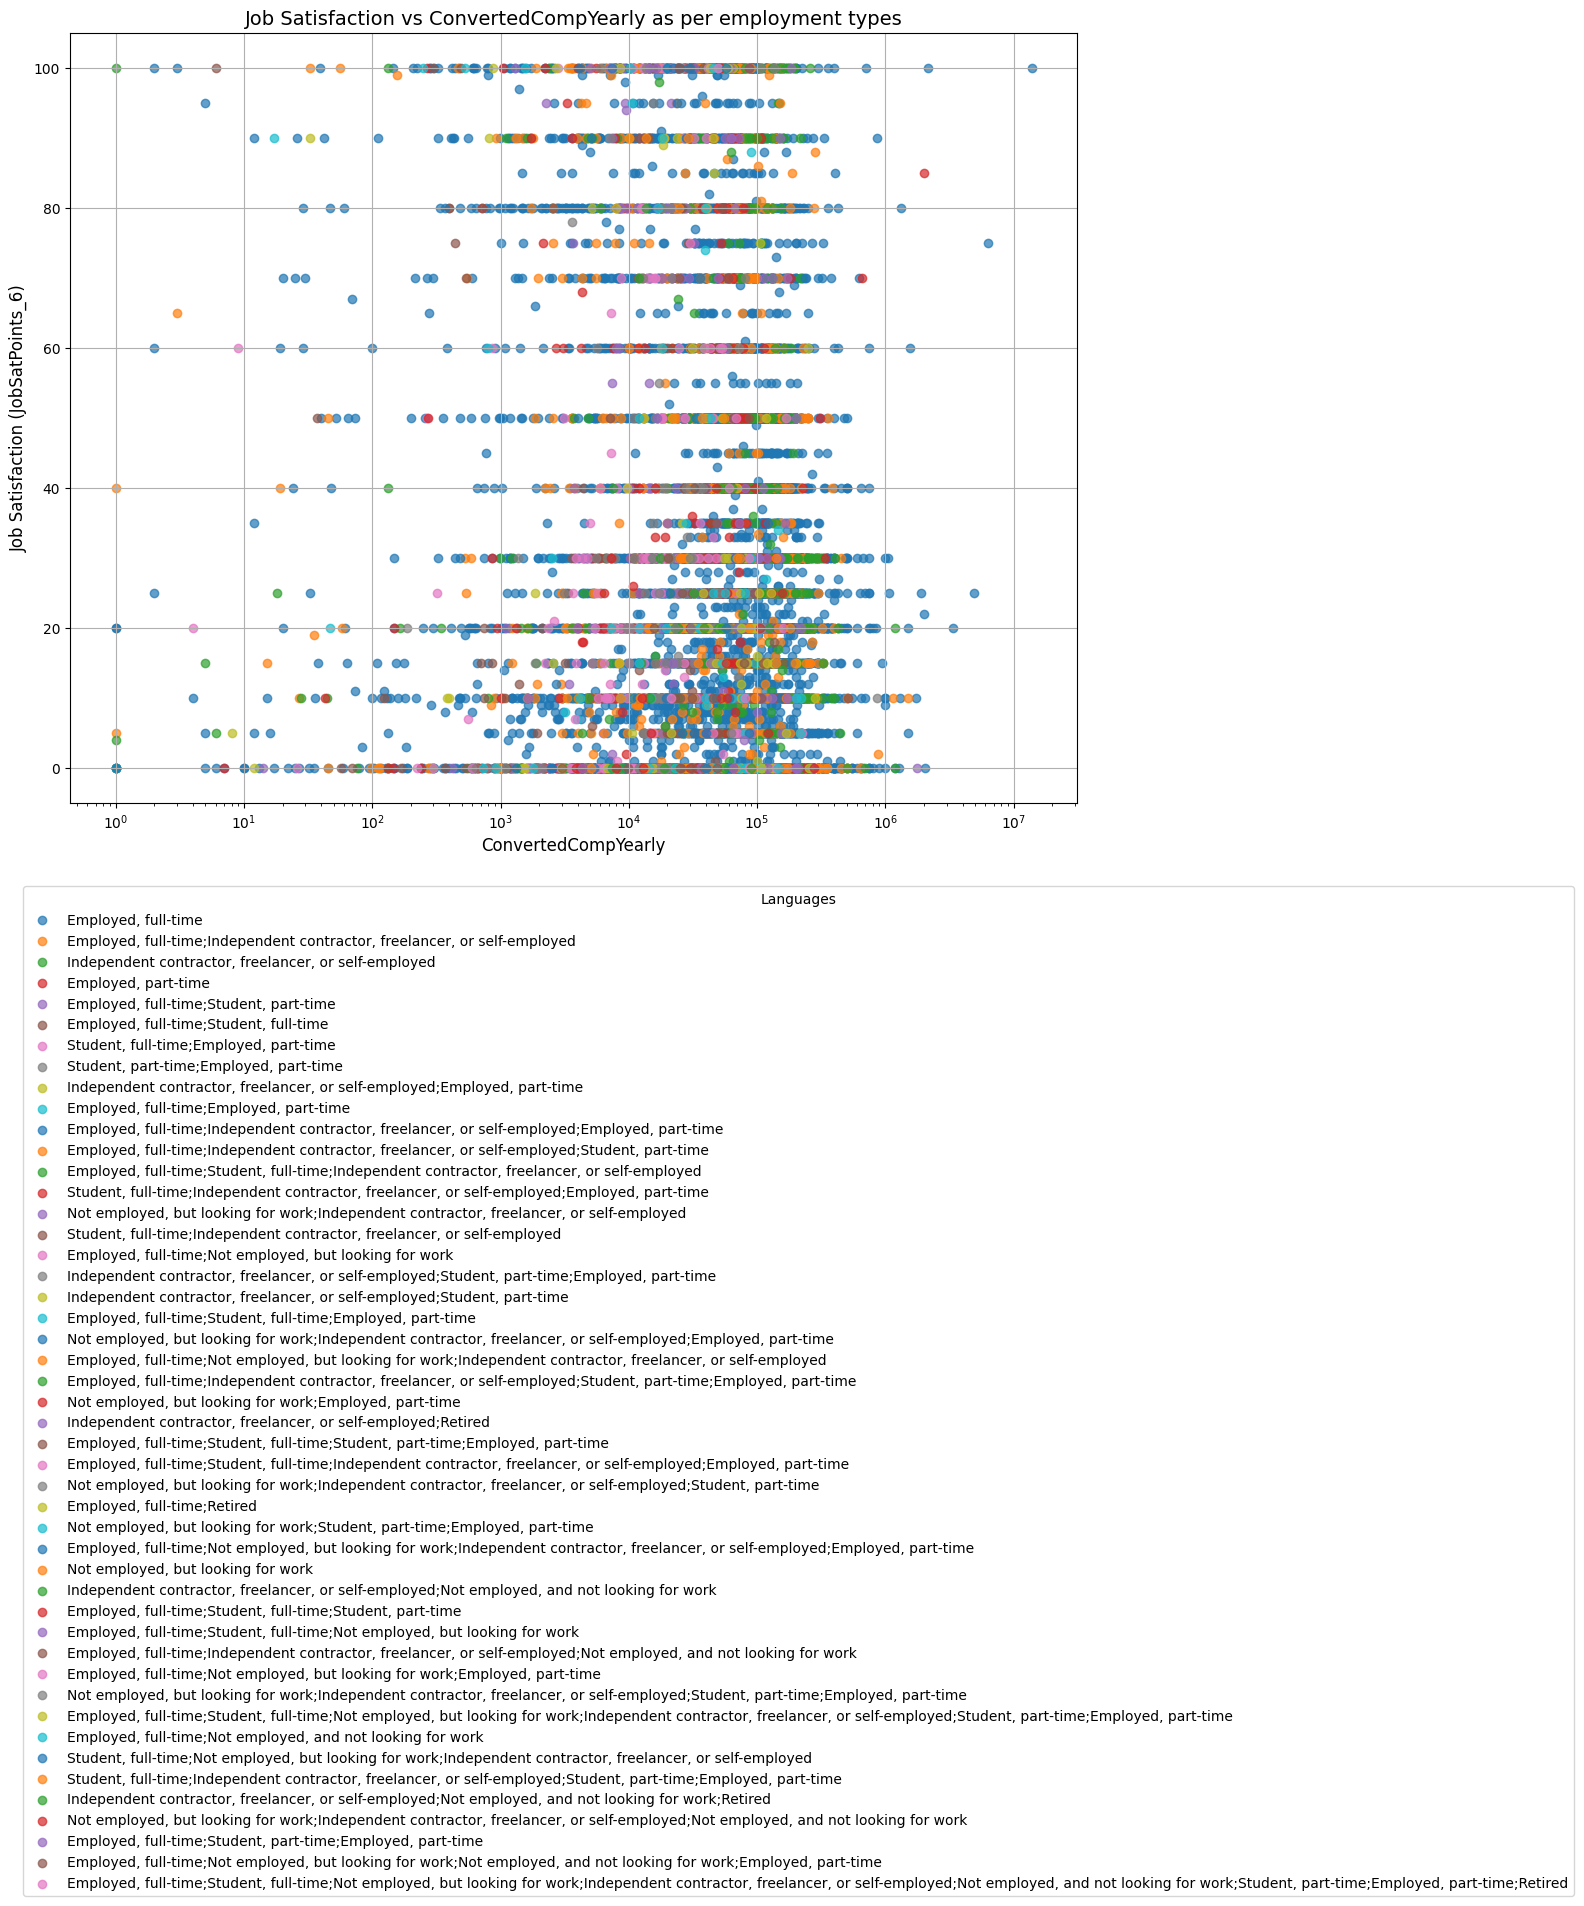

In [38]:
## Write your code here
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])
Employments = df['Employment'].value_counts().index # taken top 20 employment types 
plt.figure(figsize=(13,10))

# Iterate over each language and plot job satisfaction points
for Employment in Employments:
    subset = df[df['Employment'] == Employment]
    plt.scatter(subset['ConvertedCompYearly'], subset['JobSatPoints_6'], alpha=0.7, label=Employment)

# Customize the plot
plt.title('Job Satisfaction vs ConvertedCompYearly as per employment types', fontsize=14)
plt.xlabel('ConvertedCompYearly', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.xscale('log')
plt.grid(True)

# Optional: Add a legend to show languages
plt.legend(title='Languages', bbox_to_anchor=(1.5, -0.1), fontsize=10)

# Show the plot
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here
df = df.dropna(subset=['YearsCodePro', 'Age', 'Country'])
countries = df['Country'].unique()
age_groups = df['Age'].unique()

cmap = cm.get_cmap('tab20c', len(countries)) # Use tab20c colormap for distinct colors
colors = [cmap(i) for i in range(len(countries))]
marker_list = ['o', 's', '^', 'D', 'x', 'v']

plt.figure(figsize=(12, 8))

for idx, country in enumerate(countries):
    for age_group_idx, age_group in enumerate(age_groups):
        subset = df[(df['Country'] == country) & (df['Age'] == age_group)]
        if not subset.empty:
            # Scatter plot with dynamic color and marker assignment
            plt.scatter(subset['YearsCodePro'], subset['Age'],
                        label=f"{country} - {age_group}" ,
                        alpha=0.7,
                        marker=marker_list[age_group_idx])
            color=colors[idx],

# Customize the plot
plt.title('Work Experience vs Age Group by Country', fontsize=14)
plt.xlabel('Years of Work Experience (YearsCodePro)', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.grid(True)

plt.legend(title='Country - Age', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
